In [1]:
# get genes that are broadly expressed but low cell type specificity

In [36]:
library(tidyverse)
library(clusterProfiler)
library(org.Hs.eg.db)
library(GOSemSim)
library(enrichplot)
library(DOSE)

In [37]:
tbl <- read_csv("../../classification_1TPM/homology_mapped_o2o_ptroglodytes_hsapiens_1TPM.csv")

New names:
• `` -> `...1`
Rows: 12990 Columns: 59
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): ensembl_gene_id, hsapiens_homolog_ensembl_gene, hsapiens_homolog_o...
dbl (33): ...1, Unnamed: 0_ptroglodytes, mean_exp_ptroglodytes, min_exp_ptro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [38]:
human_all = read_csv("../../classification_1TPM/human_classes_subclass_1TPM.csv")

New names:
• `gene` -> `gene...1`
• `gene` -> `gene...11`
Rows: 16094 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): gene...1, groups_expressed, groups_not_expressed, gene...11, exps_...
dbl (15): mean_exp, min_exp, max_exp, max_2nd, n_exp, frac_exp, lim, n_over,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [39]:
human_all_df <- bitr(human_all$gene...1, fromType = "SYMBOL",
        toType = c("ENSEMBL"),
        OrgDb = org.Hs.eg.db)


'select()' returned 1:many mapping between keys and columns

Warning message in bitr(human_all$gene...1, fromType = "SYMBOL", toType = c("ENSEMBL"), :
“4.09% of input gene IDs are fail to map...”


In [40]:
human_all_df

,SYMBOL,ENSEMBL
,<chr>,<chr>
1,A2M-AS1,ENSG00000245105
2,AACSP1,ENSG00000291019
3,AAK1,ENSG00000115977
4,AARD,ENSG00000205002
5,ABAT,ENSG00000183044
6,ABCA1,ENSG00000165029
7,ABCA17P,ENSG00000238098
8,ABCA7,ENSG00000064687
9,ABHD17B,ENSG00000107362


In [41]:
hs_chimp = tbl %>% filter(spec_category_hsapiens == 'low cell type specificity') %>% 
filter(dist_category_hsapiens == 'expressed in over 90%') %>% 
filter(spec_category_ptroglodytes == 'low cell type specificity') %>% 
filter(dist_category_ptroglodytes == 'expressed in over 90%') %>% 
pull(hsapiens_homolog_ensembl_gene)

In [42]:
ego = enrichGO(gene          = hs_chimp,
               universe = human_all_df$ENSEMBL,
                OrgDb         = org.Hs.eg.db,
                keyType       = 'ENSEMBL',
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05,
                readable      = TRUE )

In [43]:
dim(ego@result)

[1] 5560    9

In [44]:
head(ego@result, n=100)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0006397,GO:0006397,mRNA processing,277/5329,419/13077,1.747422e-26,8.775643e-23,8.051262e-23,HTATSF1/TRMT2A/PPIH/HNRNPA0/USP4/SF3B1/ZRANB2/SNU13/LSM10/DHX15/DCPS/KHDRBS1/PPIL1/U2AF2/RSRC1/XAB2/CDK12/SRSF8/METTL16/ZRSR2/PPWD1/SYMPK/TXNL4A/RNPC3/CELF5/RBM22/RBM26/PRPF40B/CELF2/CRIPT/POLR2D/LSM1/SNRNP40/RBMX2/TSEN54/CPSF6/XRN2/CDC73/PTBP3/CIR1/LSM7/METTL14/SF3B3/THOC1/GPATCH1/LSM3/CPSF4/PRMT7/HNRNPA2B1/PLRG1/RPRD2/SNRNP35/SRSF11/NOVA2/SUPT6H/HSPA8/FRA10AC1/LSM11/SNRPB2/PUS7L/PHF5A/PRPF40A/DAZAP1/AKAP8L/SNRNP70/CDK13/HNRNPC/THRAP3/SFSWAP/IWS1/DBR1/PPP1R8/RBM15/SCAF1/CTNNBL1/PRMT9/CELF1/CDC40/TTF2/RBBP6/TRA2B/PPIL3/THOC7/SRSF4/ZC3H13/THOC2/CELF3/PRPF3/ZCRB1/NUDT21/DDX5/C1QBP/SRSF12/BUD13/ECD/PDE12/PCF11/SLBP/ZC3H14/SNRPC/SNW1/APP/DDX41/SFPQ/RBM48/RNPS1/CELF4/SRSF7/NPM1/DYRK1A/CWC27/RBM10/RPUSD4/SRSF2/PRPF6/SAFB2/ZNF326/TCERG1/PPIL2/SAFB/RPRD1A/DDX20/EFTUD2/TFIP11/NUP98/DDX17/SRSF6/CLNS1A/ZBTB7A/MBNL2/TSEN15/SNRPD2/RBM4B/KIN/ZNF473/CSDC2/HNRNPU/LEO1/SSU72/CHD8/PABPC1/SRSF5/RBM5/DDX23/LARP7/KHDRBS2/SLTM/ELAVL4/SF3B2/RBFOX3/RBM11/NCBP1/SMU1/LUC7L/THOC5/PSIP1/SREK1/SRPK2/CPSF7/CCAR2/WDR83/SYF2/SRRM4/PUS1/SF3A3/CSTF2/CDC5L/CPSF3/LSM4/TXNL4B/RBM3/DDX46/SART1/MAGOH/LSM5/ADARB1/CMTR1/RRP1B/RBM17/MTPAP/HNRNPLL/BCAS2/FMR1/SRSF9/SUGP1/TGS1/WBP4/CWC22/AAR2/MFAP1/RBM41/SNRPA/CACTIN/RNGTT/KDM1A/CSTF1/RBFOX1/PRPF4/TRUB1/SNRPE/CWF19L2/PPIE/SRPK1/CASC3/WTAP/RNMT/RPRD1B/RBM25/GEMIN2/TSEN2/STRAP/SNRNP200/IK/DHX9/PRMT5/GCFC2/HABP4/LUC7L3/NRDE2/HNRNPK/RBM28/PAN3/KHSRP/ZCCHC8/PRPF19/FAM50A/PAPOLA/DNAJC17/TBRG4/SART3/PNN/ARVCF/RBM23/ZMAT2/RPUSD3/ACIN1/DHX8/RSRP1/HNRNPM/SAP18/PNPT1/SLU7/SCAF8/PAPOLG/NSRP1/HNRNPH3/AQR/PTCD2/COIL/SF3A1/JMJD6/PRPF4B/WBP11/SF1/GRSF1/SUGP2/SRSF10/DDX1/GEMIN5/GEMIN8/CPSF2/MAGOHB/DHX38/WDR33/DHX35/SREK1IP1/CIRBP/CWF19L1/PRPF39/CLASRP/RBM6/FXR2/PCBP4/SRRM1/SNRNP48/CSTF3/ERN1,277
GO:0008380,GO:0008380,RNA splicing,261/5329,390/13077,3.156706e-26,8.775643e-23,8.051262e-23,METTL4/HTATSF1/PPIH/USP4/SF3B1/ZRANB2/SNU13/LSM10/DHX15/DCPS/KHDRBS1/PPIL1/U2AF2/RSRC1/XAB2/CDK12/SRSF8/METTL16/ZRSR2/PPWD1/TXNL4A/RNPC3/CELF5/RBM22/PRPF40B/CELF2/CRIPT/LSM1/SNRNP40/RBMX2/TSEN54/FAM98B/PTBP3/IVNS1ABP/CIR1/LSM7/METTL14/SF3B3/THOC1/GPATCH1/LSM3/PRMT7/HNRNPA2B1/PLRG1/SNRNP35/SRSF11/NOVA2/SUPT6H/HSPA8/FRA10AC1/SNRPB2/PHF5A/PRPF40A/DAZAP1/AKAP8L/SNRNP70/CDK13/HNRNPC/SUPT20H/THRAP3/SFSWAP/SUPT7L/IWS1/DBR1/PPP1R8/RBM15/SCAF1/CTNNBL1/MPHOSPH10/CELF1/TAF5L/CDC40/TTF2/TRA2B/PPIL3/SGF29/THOC7/SRSF4/ZC3H13/THOC2/CELF3/PRPF3/ZCRB1/DDX5/TADA1/C1QBP/SRSF12/CLK4/BUD13/TADA2B/ECD/SNRPC/SNW1/TRRAP/DDX41/SFPQ/RBM48/RNPS1/CELF4/SRSF7/NPM1/DYRK1A/CWC27/RBM10/RPUSD4/SRSF2/PRPF6/ZNF326/TCERG1/PPIL2/DDX20/EFTUD2/TFIP11/NUP98/DDX17/SRSF6/ENY2/CLNS1A/PPIG/PRMT1/ZBTB7A/MBNL2/TSEN15/SNRPD2/RBM4B/HNRNPU/FASTK/PABPC1/SRSF5/PIK3R1/RBM5/DDX23/LARP7/KHDRBS2/ELAVL4/SF3B2/RBFOX3/RBM11/NCBP1/SMU1/LUC7L/THOC5/PSIP1/SREK1/PDCD7/SRPK2/CCAR2/WDR83/SYF2/SRRM4/PUS1/SF3A3/CDC5L/LSM4/TXNL4B/RBM3/DDX46/SART1/MAGOH/LSM5/RRP1B/RBM17/HNRNPLL/BCAS2/CLK1/FMR1/SRSF9/SUGP1/TGS1/WBP4/CWC22/AAR2/MFAP1/RBM41/SNRPA/CACTIN/KDM1A/RBFOX1/CLK3/PRPF4/RBM12B/SNRPE/CWF19L2/PPIE/SRPK1/CASC3/WTAP/RBM25/GEMIN2/TSEN2/STRAP/SNRNP200/IK/DHX9/USB1/FUS/PRMT5/ZNF638/GCFC2/HABP4/LUC7L3/NRDE2/HNRNPK/ATXN7/TAF12/RBM28/KHSRP/ZCCHC8/PRPF19/FAM50A/CCNL2/DNAJC17/SART3/PNN/ARVCF/RBM23/ZMAT2/ACIN1/TAF6L/DHX8/RSRP1/HNRNPM/SAP18/SUPT3H/SLU7/NSRP1/ZBTB8OS/HNRNPH3/RP9/AQR/PPP2R1A/COIL/SF3A1/JMJD6/PRPF4B/WBP11/SF1/GRSF1/SUGP2/SRSF10/DDX1/GEMIN5/GEMIN8/MAGOHB/DHX38/DHX35/SREK1IP1/CIRBP/CWF19L1/PRPF39/CLASRP/TADA3/RBM6/FXR2/USP22/PCBP4/SRRM1/SNRNP48/KAT2A/ATXN7L3/ERN1,261
GO:0010498,GO:0010498,proteasomal protein catabolic process,298/5329,462/13077,9.704265e-26,1.798524e-22,1.650065e-22,FZR1/CHFR/SHARPIN/UBE3A/FBXO45/CAMLG/SOCS4/HECTD3/PLAA/FBXO27/PSMB5/KAT5/PIAS1/FBXL3/ANKZF1/WDR26/FBXL13/FBXL20/DDI2/UBE2G1/ZNRF1/ARIH1/PCNP/USP7/CUL4B/SIAH2/RNF175/CDC23/UBE2D1/KCTD17/UBE3D/SOCS5/N4BP1/PSMD11/MAEA/DTX4/RMND

In [45]:
ego2 <- pairwise_termsim(ego)

In [46]:
ego2@result$p.adjust_neglog10 = -log10(ego2@result$p.adjust)

In [47]:
max(head(ego2@result, n = 30)$p.adjust_neglog10)
min(head(ego2@result, n = 30)$p.adjust_neglog10)

[1] 22.05672

[1] 5.743879

In [48]:
options(repr.plot.width = 9, repr.plot.height = 8)

Warning message in treeplot.enrichResult(x, ...):
“Use 'cluster.params = list(n = your_value)' instead of 'nCluster'.
 The nCluster parameter will be removed in the next version.”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


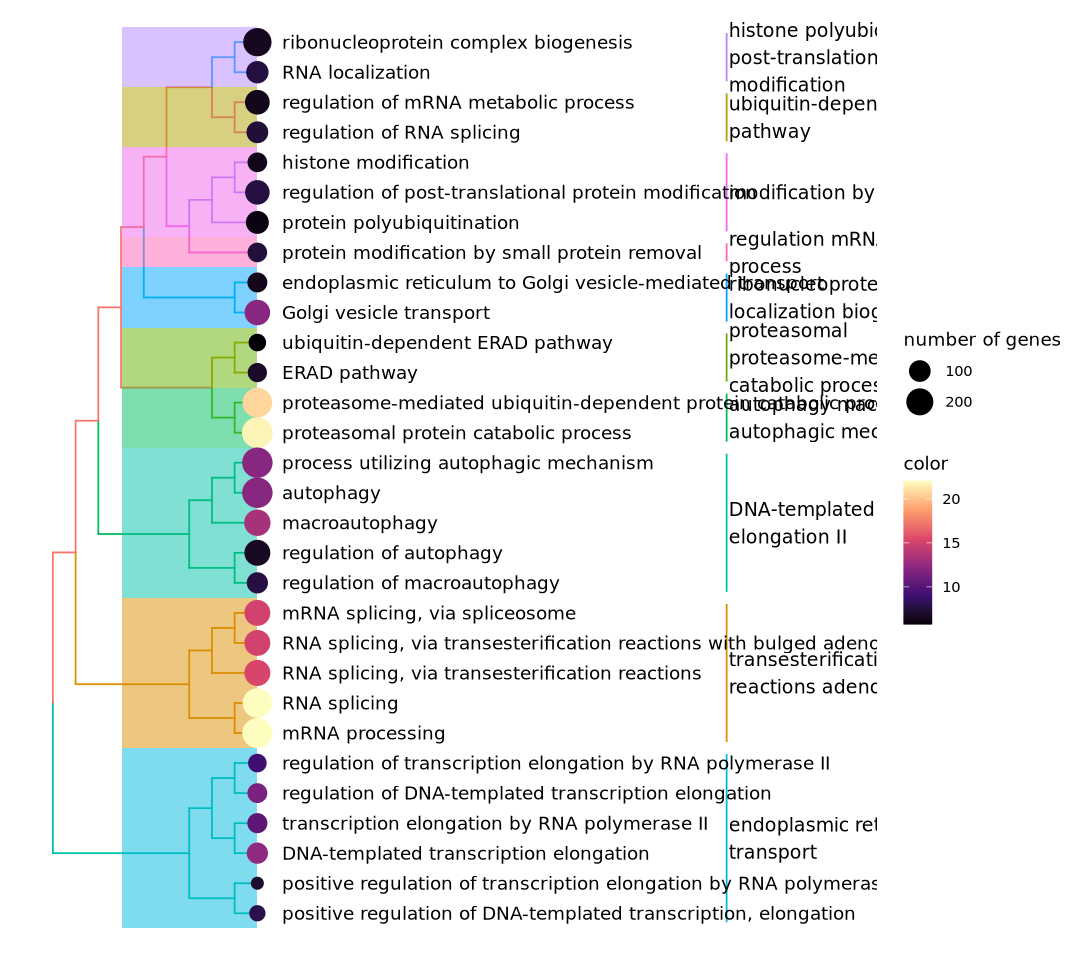

In [49]:
p1 <- treeplot(ego2, color = 'p.adjust_neglog10', 
               offset.params = list(bar_tree = rel(1.8), tiplab = rel(8)), nCluster = 10)
p1 + scale_color_viridis_c(option = 'magma')

In [50]:
ggsave(plot = p1, filename = paste0('human_chimp_lowly_specific_broadly_expressed_BP_GO_cluster.pdf'), height = 8, width = 9)

In [51]:
net <- emapplot(ego2, showCategory = 70, color = "p.adjust", cex_label_category=0.7)

Warning message in emapplot.enrichResult(x, showCategory = showCategory, ...):
“Use 'cex.params = list(category_label = your_value)' instead of 'cex_label_category'.
 The cex_label_category parameter will be removed in the next version.”


Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


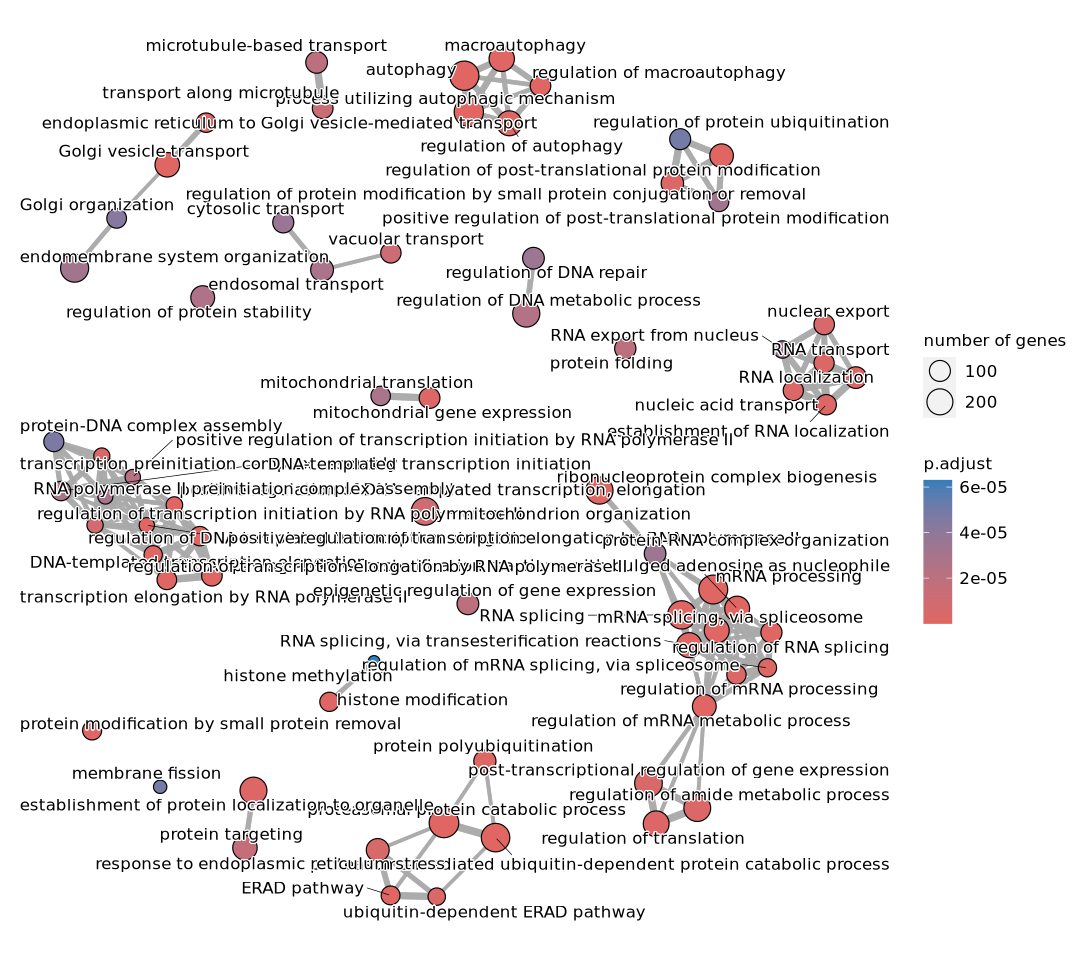

In [52]:
net

In [53]:
ggsave(plot = net, filename = paste0('human_chimp_lowly_specific_broadly_expressed_BP_GO_net.pdf'), height = 8, width = 9)
ggsave(plot = net, filename = paste0('human_chimp_lowly_specific_broadly_expressed_BP_GO_net.png'), height = 8, width = 9, units = 'in', dpi = 300)

In [54]:
for(species in c("mmulatta", "ggorilla", "cjacchus")){


tbl <- read_csv(paste0("../../classification_1TPM/homology_mapped_o2o_", species, "_hsapiens_1TPM.csv"))

hs_chimp = tbl %>% filter(spec_category_hsapiens == 'low cell type specificity') %>% 
filter(dist_category_hsapiens == 'expressed in over 90%') %>% 
filter(get(paste0("spec_category_", species)) == 'low cell type specificity') %>% 
filter(get(paste0("dist_category_", species)) == 'expressed in over 90%') %>% 
pull(hsapiens_homolog_ensembl_gene)

ego = enrichGO(gene          = hs_chimp,
               universe = human_all_df$ENSEMBL,
                OrgDb         = org.Hs.eg.db,
                keyType       = 'ENSEMBL',
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05,
                readable      = TRUE )

dim(ego@result)

head(ego@result, n=100)

ego2 <- pairwise_termsim(ego)

ego2@result$p.adjust_neglog10 = -log10(ego2@result$p.adjust)

max(head(ego2@result, n = 30)$p.adjust_neglog10)
min(head(ego2@result, n = 30)$p.adjust_neglog10)

options(repr.plot.width = 9, repr.plot.height = 8)

p1 <- treeplot(ego2, color = 'p.adjust_neglog10', 
               offset.params = list(bar_tree = rel(1.8), tiplab = rel(8)), nCluster = 10)
p1 + scale_color_viridis_c(option = 'magma')

ggsave(plot = p1, filename = paste0("human_", species, "_lowly_specific_broadly_expressed_BP_GO_cluster.pdf"), height = 8, width = 9)

net <- emapplot(ego2, showCategory = 70, color = "p.adjust", cex_label_category=0.7)

net

ggsave(plot = net, filename = paste0('human_', species, '_lowly_specific_broadly_expressed_BP_GO_net.pdf'), height = 8, width = 9)
    ggsave(plot = net, filename = paste0('human_', species, '_lowly_specific_broadly_expressed_BP_GO_net.png'), height = 8, width = 9, units = 'in', dpi = 300)

    }

New names:
• `` -> `...1`
Rows: 13193 Columns: 59
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): ensembl_gene_id, hsapiens_homolog_ensembl_gene, hsapiens_homolog_o...
dbl (33): ...1, Unnamed: 0_mmulatta, mean_exp_mmulatta, min_exp_mmulatta, ma...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in treeplot.enrichResult(x, ...):
“Use 'cluster.params = list(n = your_value)' instead of 'nCluster'.
 The nCluster parameter will be removed in the next version.”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message in emapplot.enrichResult(x, showCategory = showCategory, ...):
“Use 'cex.params = list(category_label = your_value)' instead of 'cex_label_category'.
 The cex_label_category parameter will be removed in the next version.”
Warning mess

In [55]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.9 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /nfs/research/icortes/ysong/anaconda3/envs/enrichment/lib/libopenblasp-r0.3.25.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/London
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] DOSE_3.28.2            enrichplot_1.23.1.992  GOSemSim_2.28.0       
 [4] org.Hs.eg.db_3.18.0    AnnotationDbi_1.64.1   IRanges_2.36.0        
 [7] S4Vectors_0.40.2       Bi

In [34]:
org.Hs.eg.db


Please see: help('select') for usage information



OrgDb object:
| DBSCHEMAVERSION: 2.1
| Db type: OrgDb
| Supporting package: AnnotationDbi
| DBSCHEMA: HUMAN_DB
| ORGANISM: Homo sapiens
| SPECIES: Human
| EGSOURCEDATE: 2023-Sep11
| EGSOURCENAME: Entrez Gene
| EGSOURCEURL: ftp://ftp.ncbi.nlm.nih.gov/gene/DATA
| CENTRALID: EG
| TAXID: 9606
| GOSOURCENAME: Gene Ontology
| GOSOURCEURL: http://current.geneontology.org/ontology/go-basic.obo
| GOSOURCEDATE: 2023-07-27
| GOEGSOURCEDATE: 2023-Sep11
| GOEGSOURCENAME: Entrez Gene
| GOEGSOURCEURL: ftp://ftp.ncbi.nlm.nih.gov/gene/DATA
| KEGGSOURCENAME: KEGG GENOME
| KEGGSOURCEURL: ftp://ftp.genome.jp/pub/kegg/genomes
| KEGGSOURCEDATE: 2011-Mar15
| GPSOURCENAME: UCSC Genome Bioinformatics (Homo sapiens)
| GPSOURCEURL: 
| GPSOURCEDATE: 2023-Aug20
| ENSOURCEDATE: 2023-May10
| ENSOURCENAME: Ensembl
| ENSOURCEURL: ftp://ftp.ensembl.org/pub/current_fasta
| UPSOURCENAME: Uniprot
| UPSOURCEURL: http://www.UniProt.org/
| UPSOURCEDATE: Mon Sep 18 16:12:39 2023